In [35]:
### Import relevant libraries
import pandas as pd
import numpy as np
import re
import regex
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
import datetime
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
%matplotlib inline

In [36]:
def startswithDateAndTime(s):
    #pattern for date and time
    pattern='^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)?-'
    result=re.match(pattern, s)
    if result:
        return True
    return False

In [37]:
#function to find author/s
def FindAuthor(s):
    s=s.split(":")
    if len(s)==2:
        return True
    else:
        return False

In [38]:
def getDataPointAndroid(line):
    splitLine=line.split('-')
    dateTime=splitLine[0]
    date,time=dateTime.split(',')
    message=''.join(splitLine[1:])
    if FindAuthor(message):
        splitMessage=message.split(':')
        author=splitMessage[0]
        message=''.join(splitMessage[1:])
    else:
            author=None
    return date, time, author, message

In [39]:
#getting date, time, author, message for ios
def getDataPointios(line):
    splitLine=line.split(']')
    dateTime=splitLine[0]
    if ','in dateTime:
        date, time=dateTime.split(',')
    else:
        date, time=dateTime.split(' ')
    message=' '.join(splitLine[1:])
    if FindAuthor(message):
        splitMessage=message.split(':')
        author=splitMessage[0]
        message=' '.join(splitMessage[1:])
    else:
        author=None
    if time[5]==":":
        time=time[:5]+time[-3:]
    else:
        if 'AM' in time or 'PM' in time:
            time=time[:6]+time[-3:]
        else:
            time=time[:6]
        return date, time, author, message

In [80]:
#getting number of emojis
def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI['en'] for char in word):
            emoji_list.append(word)
    
    return emoji_list

In [41]:
#list to keep track of data so that it is used in a pandas dataframe
parsedData=[]
conversationpath=r'D:\\grouptext.txt'
with open(conversationpath, encoding="utf-8")as fp:
    device=''
    first=fp.readline()
    print(first)
    if '['in first:
        device='ios'
    else:
        device="android"
    fp.readline()
    messageBuffer=[]
    date,time,author=None, None, None
    while True:
        line=fp.readline()
        if not line:
            break
        if device=="ios":
            line=line.strip()
            if startswithDateAndTime(line):
                if len(messageBuffer)>0:
                    parsedData.append([date,time,author, ' '.join(messageBuffer)])
                messageBuffer.clear()
                date,time,author,message=getDataPointios(line)
                messageBuffer.append(message)
        else:
            line=(line.encode('ascii','ignore')).decode("utf-8")
            if startswithDateAndTime(line):
                if len(messageBuffer)>0:
                    parsedData.append([date,time,author,' '.join(messageBuffer)])
                    messageBuffer.clear()
                    date,time,author,message=getDataPointAndroid(line)
                    messageBuffer.append(message)
                else:
                    messageBuffer.append(line)

11/12/20, 06:45 - Peterson created group "Teampapi Shining Stars 💙"



In [42]:
if device=='android':
    df=pd.DataFrame(parsedData, columns=['Date','Time','Author','Message'])
    df["Date"]=pd.to_datetime(df["Date"])
    df=df.dropna()
    df["emoji"]=df["Message"].apply(split_count)
    URLPATTERN=r'(https?://\s+)'
    df['urlcount']=df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
else:
    #initializing pandas dataframe
    df=pd.DataFrame(parsedData,columns=['Date','Time','Author','Message'])
    df=df.dropna()
    df["Date"]=df["Date"].apply(dateconv)
    df["Date"]=pd.to_datetime(df["Date"],format='%Y-%m-%d')
    df["emoji"]=df["Message"].apply(split_count)
    URLPATTERN=r'(https?://\s+)'
    DF['URLCOUNT']=df.Message.apply(lambda x: re.findall(URLPATTERN, X)).str.len()

In [43]:
df.head()

,Date,Time,Author,Message,emoji,urlcount
1,2020-11-18,20:44,Mbuchi,*TODAY* has to be the *DEADLINE* to send this...,[],0
2,2020-11-18,20:45,Mbuchi,*Kindly note*\n,[],0
3,2020-11-18,20:54,+254 719 556427,Happiest birthday TML\n,[],0
4,2020-11-19,06:41,Peterson,Morning family? \n,[],0
5,2020-11-19,07:03,+254 713 560618,Morning fam\n,[],0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11305 entries, 1 to 12466
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      11305 non-null  datetime64[ns]
 1   Time      11305 non-null  object        
 2   Author    11305 non-null  object        
 3   Message   11305 non-null  object        
 4   emoji     11305 non-null  object        
 5   urlcount  11305 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 618.2+ KB


In [45]:
df.Author.unique()

array([' Mbuchi', ' +254 719 556427', ' Peterson', ' +254 713 560618',
       ' +254 716 729050', ' +254 707 873740', ' +254 705 704242',
       ' +254 724 632003', ' +254 719 405351', ' +254 741 879284',
       ' +254 719 162785', ' +254 719 654217', ' +254 740 155020',
       ' +254 706 544316', ' +254 790 940056', ' +254 704 437291',
       ' +254 722 162122', ' +254 728 669757', ' +254 725 641410',
       ' +254 712 513355', ' +254 797 189992', ' +254 714 582071',
       ' +254 717 061037', ' +254 704 316310', ' +254 792 438384',
       ' +254 723 282134', ' +254 711 285385', ' +254 720 935012',
       ' +254 724 018121', ' +254 768 473226', ' +254 706 448691',
       ' Fenema', ' +254 716 027127', ' +254 729 461904',
       ' +254 769 467893', ' +254 702 806210', ' +254 702 978680',
       ' +254 729 093936', ' +254 719 648410', ' +254 707 193380',
       ' +254 705 025873', ' +254 714 949816', ' +254 704 359166',
       ' Mercy Kasmall', ' +254 772 866959', ' +254 796 771385',
  

In [46]:
total_messages=df.shape[0]
print(total_messages)

11305


In [47]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11305 entries, 1 to 12466
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      11305 non-null  datetime64[ns]
 1   Time      11305 non-null  object        
 2   Author    11305 non-null  object        
 3   Message   11305 non-null  object        
 4   emoji     11305 non-null  object        
 5   urlcount  11305 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 618.2+ KB


In [48]:
media_omitted=df[df["Message"]=='<media omitted>']

In [49]:
emojis=sum(df['emoji'].str.len())
print (emojis)

0


In [50]:
URLPATTERN=r'(https?://\s+)'#regex pattern matching with start with https
df['urlcount']=df.Message.apply(lambda x:re.findall(URLPATTERN,x)).str.len()#return url that matches with pattern and count
links=np.sum(df.urlcount)#sumup all the links
print(links)

0


Separate media messages and text messages

In [51]:
link_messages=df[df['urlcount']>0]
deleted_messages=df[(df["Message"]=="You deleted this message")|(df["Message"]=="This message was deleted.")]
media_messages_df=df[(df["Message"]=='<Media omitted>')|(df["Message"]=='image omitted')|(df["Message"]=='video omitted')]
messages_df=df.drop(media_messages_df.index)
messages_df=messages_df.drop(deleted_messages.index)
messages_df=messages_df.drop(link_messages.index)

In [52]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11305 entries, 1 to 12466
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      11305 non-null  datetime64[ns]
 1   Time      11305 non-null  object        
 2   Author    11305 non-null  object        
 3   Message   11305 non-null  object        
 4   emoji     11305 non-null  object        
 5   urlcount  11305 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 876.3+ KB


Calculating words and letters

In [53]:
messages_df['Letter_count']=messages_df['Message'].apply(lambda s :len(s))
messages_df['Word_count']=messages_df['Message'].apply(lambda s :len(s.split(' ')))
messages_df["MessageCount"]=1

In [54]:
messages_df.head()

,Date,Time,Author,Message,emoji,urlcount,Letter_count,Word_count,MessageCount
1,2020-11-18,20:44,Mbuchi,*TODAY* has to be the *DEADLINE* to send this...,[],0,70,14,1
2,2020-11-18,20:45,Mbuchi,*Kindly note*\n,[],0,15,3,1
3,2020-11-18,20:54,+254 719 556427,Happiest birthday TML\n,[],0,23,4,1
4,2020-11-19,06:41,Peterson,Morning family? \n,[],0,19,5,1
5,2020-11-19,07:03,+254 713 560618,Morning fam\n,[],0,13,3,1


In [55]:
messages_df["emojicount"]=df['emoji'].str.len()

In [56]:
messages_df["emojicount"].head()

1    0
2    0
3    0
4    0
5    0
Name: emojicount, dtype: int64

Messages by unique author

In [57]:
frnds=messages_df.Author.unique()
for i in range (len(frnds)):
    #let's filter messages of a specific author
    req_df=messages_df[messages_df["Author"]==frnds[i]]
    #req_df will contain only messages of a particular author
    print(f'stats of {frnds[i]}-')
    #shape will indirectly represnt the number of messages but by printing total rows
    print('Messages Sent',req_df.shape[0])
    #Word countv represnts total number of messages in one message
    words_per_message=(np.sum(req_df['Word_count']))/req_df.shape[0]
    print('Words per message',words_per_message)
    #media messages
    media=media_messages_df[media_messages_df['Author']==frnds[i]].shape[0]
    print('Media Messages Sent',media)
    #total emojis
    emojis=sum(req_df['emoji'].str.len())
    print('Emojis Sent',emojis)
    #total links
    links=sum(link_messages[link_messages['Author']==frnds[i]]["urlcount"])
    print('Links Sent',links)
    print()

stats of  Mbuchi-
Messages Sent 1904
Words per message 5.5719537815126055
Media Messages Sent 0
Emojis Sent 0
Links Sent 0

stats of  +254 719 556427-
Messages Sent 48
Words per message 4.020833333333333
Media Messages Sent 0
Emojis Sent 0
Links Sent 0

stats of  Peterson-
Messages Sent 294
Words per message 6.9523809523809526
Media Messages Sent 0
Emojis Sent 0
Links Sent 0

stats of  +254 713 560618-
Messages Sent 25
Words per message 5.32
Media Messages Sent 0
Emojis Sent 0
Links Sent 0

stats of  +254 716 729050-
Messages Sent 243
Words per message 10.345679012345679
Media Messages Sent 0
Emojis Sent 0
Links Sent 0

stats of  +254 707 873740-
Messages Sent 18
Words per message 6.111111111111111
Media Messages Sent 0
Emojis Sent 0
Links Sent 0

stats of  +254 705 704242-
Messages Sent 1019
Words per message 5.259077526987243
Media Messages Sent 0
Emojis Sent 0
Links Sent 0

stats of  +254 724 632003-
Messages Sent 379
Words per message 5.242744063324539
Media Messages Sent 0
Emojis 

# Unique emojis


In [58]:
total_emojis_list=list(set([a for b in messages_df.emoji for a in b]))
total_emojis=len(total_emojis_list)
print(total_emojis)

0


# Most used emojis

In [59]:
total_emojis_list=list([a for b in messages_df.emoji for a in b])
emoji_dict=dict(Counter(total_emojis_list))
emoji_dict=sorted(emoji_dict.items(),key=lambda x:x[1],reverse=True)
print(emoji_dict)

[]


In [60]:
emoji_df=pd.DataFrame(emoji_dict, columns=['emoji','count'])
emoji_df

,emoji,count


In [61]:
import plotly.express as px
fig=px.pie(emoji_df,values='count',names='emoji')
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.show()

# Times of the day when the group is most active. People are sending the most messages

Text(0, 0.5, 'Time')

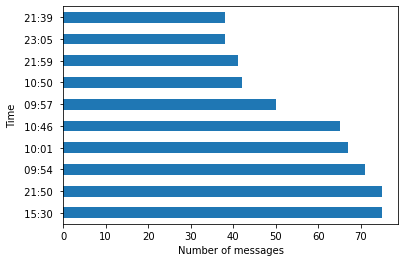

In [62]:
messages_df['Time'].value_counts().head(10).plot.barh()
plt.xlabel('Number of messages')
plt.ylabel('Time')

In [125]:
line = "🤔 🙈 me así, se 😌 ds 💕👭👙 hello 👩🏾‍🎓 emoji hello 👨‍👩‍👦‍👦 how are 😊 you today🙅🏽🙅🏽"

counter = split_count(line)
print(' '.join(emoji for emoji in counter))


🤔 🙈 😌 💕 👭 👙 👩🏾‍🎓 👨‍👩‍👦‍👦 😊 🙅🏽 🙅🏽


In [116]:
message_list=df.loc[:,'Message']
message_list

0         *TODAY* has to be the *DEADLINE* to send this...
1                                          *Kindly note*\n
2                                  Happiest birthday TML\n
3                                      Morning family?  \n
4                                            Morning fam\n
                               ...                        
11300                       We called and you answered.!\n
11301     @254720961892 uko wapi na mtu wako nimekuekea...
11302                 We are meeting at 9am at Archives \n
11303     I repeat team deadline for contributions is t...
11304                                    <Media omitted>\n
Name: Message, Length: 11305, dtype: object

In [137]:
message_list = df['Message'].astype(str)
for x in message_list:
    print(x)

 *TODAY* has to be the *DEADLINE* to send this ksh 800 for transport.

 *Kindly note*

 Happiest birthday TML

 Morning family?  

 Morning fam

 Hey single

 Hey many

 Good morning @254713560618

 Good morning team

 *BURIAL ATTENDANCE LIST*

 Ideal men are very rare but seeing you Teampapi Shining Stars *Champs*, know that you are somewhere close.

 *Happy International Men's Day bruh*

 

 Happy international men's day tupewa ku pewa

 *BURIAL ATTENDANCE LIST*

 *BURIAL ATTENDANCE LIST*

 *FARE THEE WELL DJ KIRR* 

 <Media omitted>

 *FARE THEE WELL DJ KIRR* 

 Is there anyone who feels closed out and would have  wished to  represent Teampapi tomorrow?

 Will be attending but from a different direction

 Thank You and See yu there

 *BURIAL ATTENDANCE LIST*

 *FARE THEE WELL DJ KIRR* 

 <Media omitted>

 Forever in our hears bro.

 *FARE THEE WELL DJ KIRR* 

 Shine on yu way comrade

 Kesho saa ngapi 

 Yeah tupewe time

 I am waiting for the committee's information. It's ongoing..